# Figure 1 summary plots

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

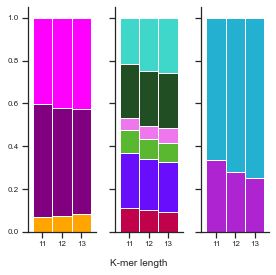

In [13]:
fig, axs = plt.subplots(ncols=3, sharey=True)

sns.set(style="white", 
palette="pastel", 
rc={'figure.figsize':(5,4)
	})

##### Ins/Dels/Subs plot
df = pd.read_csv("basic_mutation.txt", sep="\t", index_col=0)
df.loc['sum'] = df.sum(axis=0)
prop_df = pd.DataFrame()
prop_df['dels_prop'] = df.loc['dels'] / df.loc['sum']
prop_df['ins_prop'] = df.loc['ins'] / df.loc['sum']
prop_df['subs_prop'] = df.loc['subs'] / df.loc['sum']


g = prop_df.plot(kind='bar', 
				 stacked=True, 
				 color = {"ins_prop":"purple", "dels_prop":"orange", "subs_prop":"magenta"},
				width = 1, ax = axs[0])

g.legend_.remove()
g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.tick_params(labelsize=8, bottom=True, left=True)

### Substitutions plot
df = pd.read_csv("basic_subs_mutations.txt", sep="\t", index_col=0)
df.loc['sum'] = df.sum(axis=0)
prop_df = pd.DataFrame()
for sigtype in df.index[:-1]:
	prop_df[sigtype] = df.loc[sigtype] / df.loc['sum']

label2color = {'C>A': '#c0024b', 'C>G': '#680efd', 'C>T': '#59b730', 'T>A': '#ee77ee', 'T>C': '#214e23', 'T>G': '#3ed7c9'}
g = prop_df.plot(kind='bar',
				 stacked=True, 
				 color=label2color,
				width = 1, ax = axs[1])

g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.tick_params(labelsize=8, bottom=True, left=True)
g.legend_.remove()

### Coding/NonCoding plot
countdf =pd.read_csv("CDS_v_noncoding/CDS_v_noncoding_linecounts.txt", sep=" ", header=None)
count2df = dict(zip(countdf.iloc[:,1], countdf.iloc[:,0]))
df = pd.DataFrame(index=['cds', 'ncds'])
for k in range(11, 14):
	coding_out = f"mutations_{k}bp_nulls_rmsk_CDS.bed"
	coding_numlines = int(count2df[coding_out])
	noncoding_out = f"mutations_{k}bp_nulls_rmsk_nonCoding.bed"
	noncoding_numlines = int(count2df[noncoding_out])
	df[k]=[coding_numlines, noncoding_numlines]
prop_df = pd.DataFrame()
prop_df['cds_prop'] = df.loc['cds'] / (df.loc['cds'] + df.loc['ncds'])
prop_df['ncds_prop'] = df.loc['ncds'] / (df.loc['cds'] + df.loc['ncds'])

region2color = {'cds_prop': '#ae24d1', 'ncds_prop':'#24b1d1'}

g = prop_df.plot(kind='bar', stacked=True, color=region2color, width=1, ax=axs[2])
g.set_ylabel("")
g.legend_.remove()
g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.tick_params(labelsize=8, bottom=True, left=True)
fig.supxlabel("K-mer length", fontsize=10, y=0.05)
plt.show()
plt.close()